<h1 align='center'> Linear Regression with Generated Data in Pytorch </h1>

## Importing Necessary Modules

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
torch.__version__

'1.4.0'

## Creating Dummy Data

In [3]:
x = torch.linspace(0.,50.,50).reshape(-1,1)

In [4]:
e = torch.randint(-10,+11,(50,1),dtype=torch.float)

In [5]:
y  = 2*x+1 + e

Actual weights and bias based on the equation.

- weight = 2
- bias = 1

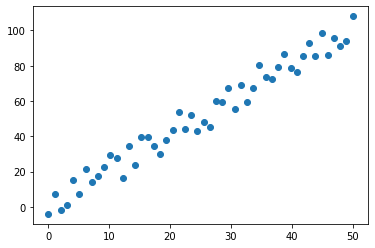

In [6]:
plt.scatter(x,y)
plt.show()

## Defining the module

In [7]:
class Model(nn.Module):
    
    # Initializing the class
    def __init__(self,in_features,out_features):
        
        #Initializing the base class
        super().__init__()
        #
        self.linear = nn.Linear(in_features,out_features)
    
    def forward(self,x):
        ypred = self.linear(x)
        return ypred

In [8]:
#Creating an instance of the class
model = Model(1,1)

ypred=model.forward(x)

Now from the above we have just did a forward pass where nn.Linear will assign a random weight and bias. So we will expect our model to perform really badly

In [9]:
model.linear.weight.item(),model.linear.bias.item()

(0.6533929109573364, -0.5177580118179321)

In [10]:
print(f'As we guessed the value of weight {model.linear.weight.item():.2f} and bias {model.linear.bias.item():.2f} Is far from the original values')

As we guessed the value of weight 0.65 and bias -0.52 Is far from the original values


In [11]:
x.size()

torch.Size([50, 1])

In [12]:
ypred.size()

torch.Size([50, 1])

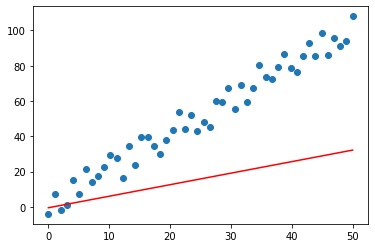

In [13]:
plt.scatter(x,y)
plt.plot(x.numpy().flatten() , ypred.detach().numpy().flatten(),c="red")
plt.show()

## Lets train the model

- We have to mention the criterion on which we train our model
- The optimizer which we are going to use
- Number of epochs for which we are going to run the model for

In [14]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

epochs = 50
losses = [] # To keep track of the loss generated so we can visualize

for i in range(epochs):
    i +=1
    
    
    ypred = model.forward(x)
    
    loss= criterion(ypred,y)
    
    losses.append(loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    print(f'epoch:{i}, loss:{loss.item():.2f},weight:{model.linear.weight.item():.2f},bias:{model.linear.bias.item():.2f}')

epoch:1, loss:1684.86,weight:3.01,bias:-0.45
epoch:2, loss:808.46,weight:1.40,bias:-0.49
epoch:3, loss:397.03,weight:2.50,bias:-0.46
epoch:4, loss:203.90,weight:1.74,bias:-0.48
epoch:5, loss:113.23,weight:2.26,bias:-0.47
epoch:6, loss:70.66,weight:1.91,bias:-0.48
epoch:7, loss:50.68,weight:2.15,bias:-0.47
epoch:8, loss:41.30,weight:1.98,bias:-0.47
epoch:9, loss:36.90,weight:2.10,bias:-0.47
epoch:10, loss:34.83,weight:2.02,bias:-0.47
epoch:11, loss:33.86,weight:2.07,bias:-0.47
epoch:12, loss:33.40,weight:2.04,bias:-0.47
epoch:13, loss:33.19,weight:2.06,bias:-0.46
epoch:14, loss:33.08,weight:2.05,bias:-0.46
epoch:15, loss:33.04,weight:2.06,bias:-0.46
epoch:16, loss:33.01,weight:2.05,bias:-0.46
epoch:17, loss:33.00,weight:2.05,bias:-0.46
epoch:18, loss:33.00,weight:2.05,bias:-0.46
epoch:19, loss:32.99,weight:2.05,bias:-0.46
epoch:20, loss:32.99,weight:2.05,bias:-0.46
epoch:21, loss:32.99,weight:2.05,bias:-0.46
epoch:22, loss:32.99,weight:2.05,bias:-0.46
epoch:23, loss:32.99,weight:2.05,bi

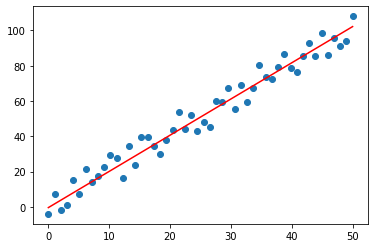

In [15]:
plt.scatter(x,y)
plt.plot(x.numpy().flatten() , ypred.detach().numpy().flatten(),c="red")
plt.show()

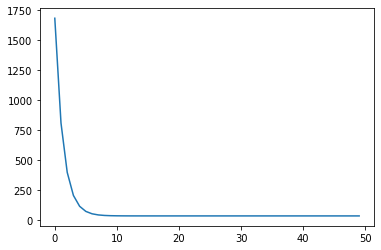

In [16]:
plt.plot(range(epochs),losses)
plt.show()